In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.cross_validation import train_test_split

In [5]:
df = pd.read_csv('gbm-data.csv')

In [6]:
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
x = df.drop('Activity', axis=1).values
y = df.Activity.values

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.8, random_state=241
)

In [51]:
%matplotlib inline

In [22]:
learning_rates = [1, 0.5, 0.3, 0.2, 0.1]

In [52]:
def sigm(x):
    return 1.0 / (1 + np.exp(-x))

*************** Rate: 1.000000 ***************
      Iter       Train Loss   Remaining Time 
         1           1.0190           25.24s
         2           0.9192           22.27s
         3           0.8272           19.65s
         4           0.7834           17.78s
         5           0.7109           16.88s
         6           0.6368           16.65s
         7           0.5797           16.22s
         8           0.5610           15.60s
         9           0.5185           15.21s
        10           0.4984           14.81s
        20           0.1999           14.13s
        30           0.1313           12.96s
        40           0.0790           12.11s
        50           0.0511           11.61s
        60           0.0352           10.89s
        70           0.0245           10.17s
        80           0.0162            9.52s
        90           0.0114            8.90s
       100           0.0077            8.31s
       200           0.0004            2.56s

min_tr

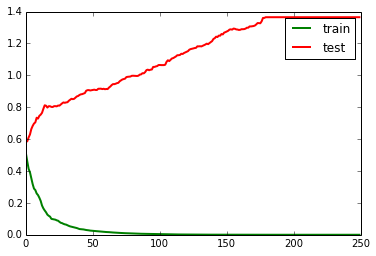

*************** Rate: 0.500000 ***************
      Iter       Train Loss   Remaining Time 
         1           1.1255           16.05s
         2           1.0035           16.27s
         3           0.9386           16.16s
         4           0.8844           15.51s
         5           0.8381           15.22s
         6           0.7995           14.82s
         7           0.7559           14.56s
         8           0.7205           14.42s
         9           0.6958           14.21s
        10           0.6725           14.06s
        20           0.4672           12.84s
        30           0.3179           12.22s
        40           0.2274           11.62s
        50           0.1774           10.97s
        60           0.1394           10.39s
        70           0.1050            9.86s
        80           0.0805            9.30s
        90           0.0650            8.73s
       100           0.0511            8.21s
       200           0.0058            2.74s

min_tr

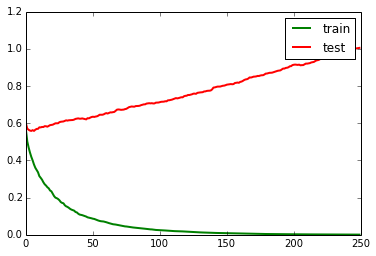

*************** Rate: 0.300000 ***************
      Iter       Train Loss   Remaining Time 
         1           1.2095           16.03s
         2           1.1006           16.22s
         3           1.0240           16.18s
         4           0.9729           16.24s
         5           0.9387           15.69s
         6           0.8948           15.79s
         7           0.8621           15.48s
         8           0.8360           15.10s
         9           0.8171           14.76s
        10           0.7883           14.59s
        20           0.6164           13.07s
        30           0.4933           12.22s
        40           0.4248           11.51s
        50           0.3345           11.00s
        60           0.2760           10.48s
        70           0.2263            9.92s
        80           0.1971            9.29s
        90           0.1693            8.74s
       100           0.1388            8.27s
       200           0.0294            2.73s

min_tr

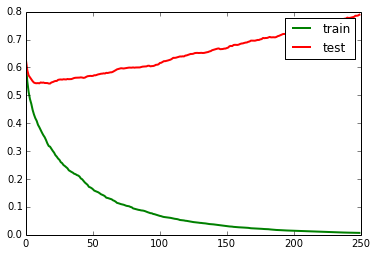

*************** Rate: 0.200000 ***************
      Iter       Train Loss   Remaining Time 
         1           1.2613           15.96s
         2           1.1715           16.10s
         3           1.1009           16.05s
         4           1.0529           16.00s
         5           1.0130           16.13s
         6           0.9740           16.07s
         7           0.9475           15.57s
         8           0.9197           15.59s
         9           0.8979           15.23s
        10           0.8730           15.18s
        20           0.7207           13.58s
        30           0.6055           12.84s
        40           0.5244           12.11s
        50           0.4501           11.46s
        60           0.3908           10.82s
        70           0.3372           10.24s
        80           0.3009            9.66s
        90           0.2603            9.12s
       100           0.2327            8.51s
       200           0.0835            2.80s

min_tr

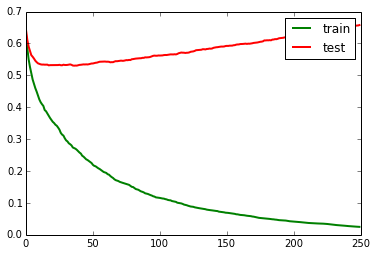

*************** Rate: 0.100000 ***************
      Iter       Train Loss   Remaining Time 
         1           1.3199           15.92s
         2           1.2645           16.20s
         3           1.2170           16.15s
         4           1.1775           16.18s
         5           1.1404           16.11s
         6           1.1106           16.06s
         7           1.0844           15.98s
         8           1.0617           15.93s
         9           1.0411           15.83s
        10           1.0223           15.74s
        20           0.8864           14.40s
        30           0.7844           13.44s
        40           0.7176           12.47s
        50           0.6590           11.90s
        60           0.6120           11.14s
        70           0.5599           10.66s
        80           0.5242            9.99s
        90           0.4829            9.44s
       100           0.4473            8.85s
       200           0.2379            2.84s

min_tr

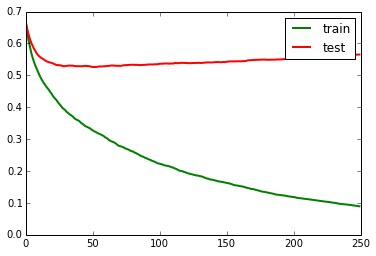

In [74]:
for rate in learning_rates:
    print '*' * 15 + ' Rate: %f ' % rate + '*' * 15
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, 
                                     random_state=241, learning_rate=rate)
    clf.fit(x_train, y_train)
    
    log_loss_train = []
    log_loss_test = []
    for y_pred in clf.staged_decision_function(x_train):
        log_loss_train.append(log_loss(y_train, sigm(y_pred)))
    for y_pred in clf.staged_decision_function(x_test):
        log_loss_test.append(log_loss(y_test, sigm(y_pred)))
    
    print '\nmin_train_it:', log_loss_train.index(min(log_loss_train))
    print 'min_test_it:', log_loss_test.index(min(log_loss_test))
    print 'min_train:', min(log_loss_train)
    print 'min_test:', min(log_loss_test)
    
    plt.figure()
    plt.plot(log_loss_train, 'g', linewidth=2)
    plt.plot(log_loss_test, 'r', linewidth=2)
    plt.legend(['train', 'test'])
    plt.show()
    

In [75]:
clf = RandomForestClassifier(random_state=241, n_estimators=37)

In [76]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=37, n_jobs=1,
            oob_score=False, random_state=241, verbose=0, warm_start=False)

In [77]:
pred_y = clf.predict_proba(x_test)[:,1]

In [79]:
log_loss(y_test, pred_y)

0.54091190993698968